In [1]:
import simpful as sf

In [2]:
FS = sf.FuzzySystem()

  ____  __  _  _  ____  ____  _  _  __   
 / ___)(  )( \/ )(  _ \(  __)/ )( \(  ) v2.12.0 
 \___ \ )( / \/ \ ) __/ ) _) ) \/ (/ (_/\ 
 (____/(__)\_)(_/(__)  (__)  \____/\____/

 https://github.com/aresio/simpful



In [3]:
# Zmienna lingwistyczna - jakość jedzenia
S_1 = sf.FuzzySet(function=sf.Triangular_MF(a=0, b=0, c=5), term="poor")
S_2 = sf.FuzzySet(function=sf.Triangular_MF(a=0, b=5, c=10), term="average")
S_3 = sf.FuzzySet(function=sf.Triangular_MF(a=5, b=10, c=10), term="good")
FS.add_linguistic_variable(
    "Food", sf.LinguisticVariable([S_1, S_2, S_3], universe_of_discourse=[0, 10])
)

In [4]:
# Zmienna lingwistyczna - jakość obsługi
S_4 = sf.FuzzySet(function=sf.Triangular_MF(a=0, b=0, c=5), term="poor")
S_5 = sf.FuzzySet(function=sf.Triangular_MF(a=0, b=5, c=10), term="average")
S_6 = sf.FuzzySet(function=sf.Triangular_MF(a=5, b=10, c=10), term="good")
FS.add_linguistic_variable(
    "Service", sf.LinguisticVariable([S_4, S_5, S_6], universe_of_discourse=[0, 10])
)

In [5]:
# Zmienna lingwistyczna - napiwek
T_1 = sf.FuzzySet(function=sf.Triangular_MF(a=0, b=5, c=10), term="low")
T_2 = sf.FuzzySet(function=sf.Triangular_MF(a=10, b=15, c=20), term="medium")
T_3 = sf.FuzzySet(function=sf.Triangular_MF(a=20, b=25, c=30), term="high")
FS.add_linguistic_variable(
    "Tip", sf.LinguisticVariable([T_1, T_2, T_3], universe_of_discourse=[0, 30])
)

In [6]:
# Dodanie reguł
R1 = "IF (Food IS poor) OR (Service IS poor) THEN (Tip IS low)"
R2 = "IF (Food IS average) THEN (Tip IS medium)"
R3 = "IF (Food IS good) OR (Service IS good) THEN (Tip IS high)"
FS.add_rules([R1, R2, R3])

In [7]:
FS.set_crisp_output_value("low", 5)
FS.set_crisp_output_value("medium", 15)
FS.set_crisp_output_value("high", 25)

 * Detected Sugeno model type


In [8]:
FS.set_variable("Food", 8)
FS.set_variable("Service", 6)
tip = FS.Mamdani_inference(["Tip"])
tip

{'Tip': 20.67569939018154}

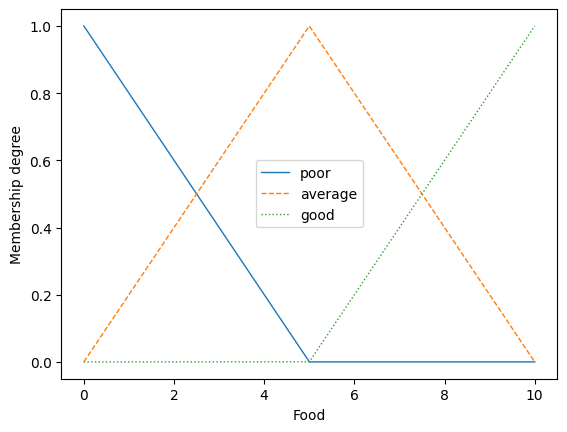

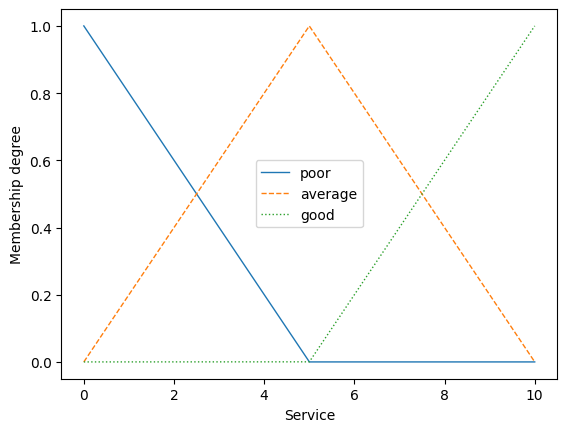

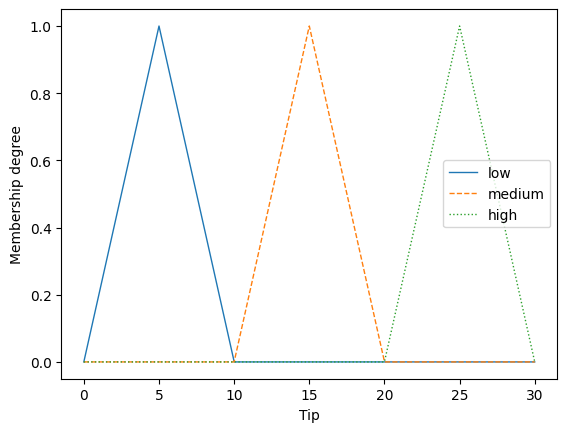

In [9]:
FS.plot_variable("Food")
FS.plot_variable("Service")
FS.plot_variable("Tip")

In [10]:
test_cases = [
    {"Food": 3, "Service": 4},
    {"Food": 7, "Service": 8},
    {"Food": 5, "Service": 2},
    {"Food": 9, "Service": 9},
]

In [11]:
for case in test_cases:
    FS.set_variable("Food", case["Food"])
    FS.set_variable("Service", case["Service"])
    tip = FS.Mamdani_inference(["Tip"])
    print(f"Food: {case['Food']}, Service: {case['Service']} -> Tip: {tip['Tip']:.2f}%")

Food: 3, Service: 4 -> Tip: 10.68%
Food: 7, Service: 8 -> Tip: 20.00%
Food: 5, Service: 2 -> Tip: 10.43%
Food: 9, Service: 9 -> Tip: 22.27%
